In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
quote_soup = soup(html, 'html.parser')



====== WebDriver manager ======
Current google-chrome version is 108.0.5359
Get LATEST chromedriver version for 108.0.5359 google-chrome
Driver [C:\Users\mehro\.wdm\drivers\chromedriver\win32\108.0.5359.71\chromedriver.exe] found in cache


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

In [3]:
table = pd.read_html(url)

In [4]:
table_df = pd.DataFrame(table[0])
table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
#How many months exist on mars?
month_column = table_df["month"]
max = month_column.max()
print(f"There are {max} months in mars.")

There are 12 months in mars.


In [7]:
#How many Martian (and not Earth) 
#days worth of data exist in the scraped dataset?
length_of_dataset = len(table_df)
print(f"There are {length_of_dataset} Martian days worth of data.")

There are 1867 Martian days worth of data.


In [9]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)?
average_temp = table_df.groupby('month')['min_temp'].mean()
average_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [13]:
#Find minimum temperature for all of the months
print(f"The lowest minimum average temperature is {average_temp.min()}.It occurs in month {average_temp.argmin()+1}")

The lowest minimum average temperature is -83.30729166666667.It occurs in month 3


In [14]:
#Find highest minimum temperature for all of the months
print(f"The highest minimum average temperature is {average_temp.max()}.It occurs in month {average_temp.argmax()+1}")

The highest minimum average temperature is -68.38297872340425.It occurs in month 8


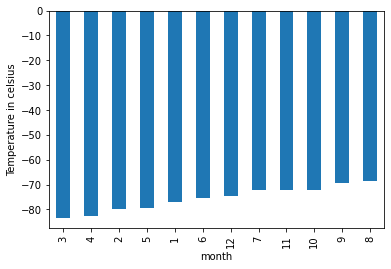

In [17]:
#Plot the results as a bar chart.
average_temp.sort_values().plot(kind='bar')
plt.ylabel('Temperature in celsius')
plt.show()

In [18]:
#Find the average the daily atmospheric pressure of all the months.
average_psi = table_df.groupby('month')['pressure'].mean()
average_psi

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [19]:
# Find the lowest minimum pressure
print(f"The lowest minimum average pressure is {average_psi.min()}.It occurs in month {average_psi.argmin()+1}")

The lowest minimum average pressure is 745.0544217687075.It occurs in month 6


In [20]:
#Find the highest minimum pressure.
print(f"The highest minimum average pressure is {average_psi.max()}.It occurs in month {average_psi.argmax()+1}")

The highest minimum average pressure is 913.3059701492538.It occurs in month 9


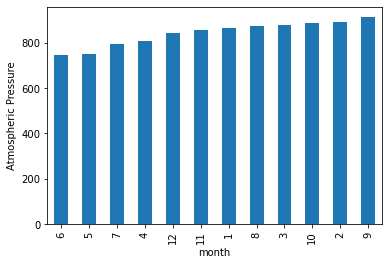

In [21]:
#Plot a bar graph with results.
average_psi.sort_values().plot(kind='bar')
plt.ylabel('Atmospheric Pressure')
plt.show()

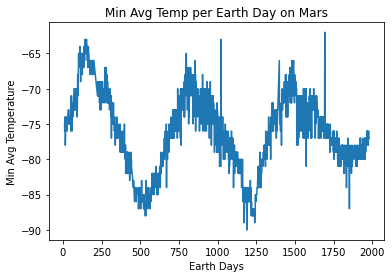

In [23]:
#About how many terrestrial (Earth) days exist in a Martian year? 
x = table_df['sol']
y = table_df['min_temp']

plt.plot(x,y)
plt.ylabel("Min Avg Temperature")
plt.xlabel("Earth Days")
plt.title("Min Avg Temp per Earth Day on Mars")
plt.show()

In [24]:
#Export the DataFrame to a CSV file.
table_df.to_csv('Mars.csv')

In [25]:
browser.quit()